## Парсинг – продолжение

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import requests  

url = 'http://books.toscrape.com/catalogue/page-1.html'
response = requests.get(url)
response

<Response [200]>

In [3]:
response.content[:1000]

b'\n\n<!DOCTYPE html>\n<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\n<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->\n<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->\n<!--[if gt IE 8]><!--> <html lang="en-us" class="no-js"> <!--<![endif]-->\n    <head>\n        <title>\n    All products | Books to Scrape - Sandbox\n</title>\n\n        <meta http-equiv="content-type" content="text/html; charset=UTF-8" />\n        <meta name="created" content="24th Jun 2016 09:30" />\n        <meta name="description" content="" />\n        <meta name="viewport" content="width=device-width" />\n        <meta name="robots" content="NOARCHIVE,NOCACHE" />\n\n        <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->\n        <!--[if lt IE 9]>\n        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>\n        <![endif]-->\n\n        \n            <link rel="shortcut icon"

In [4]:
from bs4 import BeautifulSoup

In [5]:
tree = BeautifulSoup(response.content, 'html.parser')

In [7]:
tree.html.head.title.text.strip()

'All products | Books to Scrape - Sandbox'

In [8]:
books = tree.find_all('article', {'class' : 'product_pod'})
books[0]

<article class="product_pod">
<div class="image_container">
<a href="a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="../media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
</div>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<div class="product_price">
<p class="price_color">£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>

In [9]:
books[0].find('p', {'class': 'price_color'}).text

'£51.77'

In [10]:
books[0].p.get('class')[1]

'Three'

In [11]:
books[0].a.get('href')

'a-light-in-the-attic_1000/index.html'

In [12]:
books[0].h3.a.get('title')

'A Light in the Attic'

In [13]:
def get_page(p):
    url = 'http://books.toscrape.com/catalogue/page-{}.html'.format(p)
    response = requests.get(url)
    tree = BeautifulSoup(response.content, 'html.parser')
    books = tree.find_all('article', {'class' : 'product_pod'})
    
    info = []
    
    for book in books:
        info.append({'price': book.find('p', {'class': 'price_color'}).text,
                     'href': book.h3.a.get('href'),
                     'title': book.h3.a.get('title'),
                    'rating': book.p.get('class')[1]})
                     
    return info

In [14]:
import time
infa = []

for p in range(1,51):
    try:
        infa.extend(get_page(p))
        time.sleep(5)
    except:
        print(p)

In [16]:
import pandas as pd

df = pd.DataFrame(infa)
print(df.shape)
df.head()

(1000, 4)


price                                               href  \
0  £51.77               a-light-in-the-attic_1000/index.html   
1  £53.74                  tipping-the-velvet_999/index.html   
2  £50.10                          soumission_998/index.html   
3  £47.82                       sharp-objects_997/index.html   
4  £54.23  sapiens-a-brief-history-of-humankind_996/index...   

                                   title rating  
0                   A Light in the Attic  Three  
1                     Tipping the Velvet    One  
2                             Soumission    One  
3                          Sharp Objects   Four  
4  Sapiens: A Brief History of Humankind   Five

In [19]:
df.to_csv('books_parsed.csv', index=False)

In [21]:
df.to_excel('books_parsed.xlsx', index=False)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   1000 non-null   float64
 1   href    1000 non-null   object 
 2   title   1000 non-null   object 
 3   rating  1000 non-null   object 
dtypes: float64(1), object(3)
memory usage: 31.4+ KB


In [25]:
float(df.loc[0, 'price'][1:])

51.77

In [26]:
def get_price(price):
    return float(price[1:])

In [29]:
df['price'] = df['price'].apply(get_price)

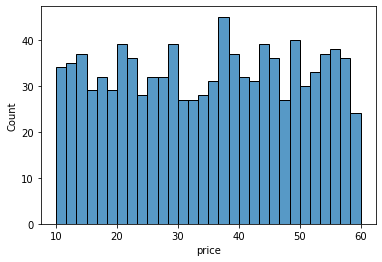

In [34]:
sns.histplot(data=df, x='price', bins=30);

In [35]:
def get_rating(r):
    if r == "One":
        return 1
    elif r == "Two":
        return 2
    elif r == 'Three':
        return 3
    elif r == 'Four':
        return 4
    else:
        return 5

In [37]:
df['rating'] = df['rating'].apply(get_rating)

In [38]:
df.rating.value_counts()

1    226
3    203
5    196
2    196
4    179
Name: rating, dtype: int64

## Парсинг – задание

По аналогии с работой на семинаре Вам предстоит собрать данные с сайта https://quotes.toscrape.com/. 

Нужно получить pandas dataframe, где есть колонки:
* `quote` – цитата
* `author` – автор
* `название_тега` – 1, если этот тег стоит у цитаты, и 0, если нет. Количество таких колонок равно количеству тегов на сайте.

Выведите все цитаты, у которых есть тег "truth".

In [39]:
url = 'https://quotes.toscrape.com/page/1/'

In [40]:
response = requests.get(url)
response

<Response [200]>

In [41]:
tree = BeautifulSoup(response.content, 'html.parser')

In [43]:
quotes = tree.find_all('div', {'class' : 'quote'})
quotes[0]

<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
<span>by <small class="author" itemprop="author">Albert Einstein</small>
<a href="/author/Albert-Einstein">(about)</a>
</span>
<div class="tags">
            Tags:
            <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
<a class="tag" href="/tag/change/page/1/">change</a>
<a class="tag" href="/tag/deep-thoughts/page/1/">deep-thoughts</a>
<a class="tag" href="/tag/thinking/page/1/">thinking</a>
<a class="tag" href="/tag/world/page/1/">world</a>
</div>
</div>

In [45]:
quotes[0].span.text

'“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”'

In [51]:
quotes[0].find('small', {'class':'author'}).text

'Albert Einstein'

In [75]:
quotes[0].find_all('a', {'class': 'tag'})

[<a class="tag" href="/tag/change/page/1/">change</a>,
 <a class="tag" href="/tag/deep-thoughts/page/1/">deep-thoughts</a>,
 <a class="tag" href="/tag/thinking/page/1/">thinking</a>,
 <a class="tag" href="/tag/world/page/1/">world</a>]

In [77]:
quotes[0].find_all('a', {'class': 'tag'})[0].text

'change'

In [53]:
tags = []
for tag in quotes[0].find_all('a', {'class': 'tag'}):
    tags.append(tag.text)
tags

['change', 'deep-thoughts', 'thinking', 'world']

In [78]:
info = []
for q in quotes:
    
    tags = []
    for tag in q.find_all('a', {'class': 'tag'}):
        tags.append(tag.text)
        
    info.append({'quote': q.span.text,
                'author': q.find('small', {'class':'author'}).text,
                'tags': tags})

In [79]:
info

[{'quote': '“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”',
  'author': 'Albert Einstein',
  'tags': ['change', 'deep-thoughts', 'thinking', 'world']},
 {'quote': '“It is our choices, Harry, that show what we truly are, far more than our abilities.”',
  'author': 'J.K. Rowling',
  'tags': ['abilities', 'choices']},
 {'quote': '“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”',
  'author': 'Albert Einstein',
  'tags': ['inspirational', 'life', 'live', 'miracle', 'miracles']},
 {'quote': '“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”',
  'author': 'Jane Austen',
  'tags': ['aliteracy', 'books', 'classic', 'humor']},
 {'quote': "“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”",
  'author': 'Marilyn Monroe',
  'tags': 

In [80]:
response.content[:1000]

b'<!DOCTYPE html>\n<html lang="en">\n<head>\n\t<meta charset="UTF-8">\n\t<title>Quotes to Scrape</title>\n    <link rel="stylesheet" href="/static/bootstrap.min.css">\n    <link rel="stylesheet" href="/static/main.css">\n</head>\n<body>\n    <div class="container">\n        <div class="row header-box">\n            <div class="col-md-8">\n                <h1>\n                    <a href="/" style="text-decoration: none">Quotes to Scrape</a>\n                </h1>\n            </div>\n            <div class="col-md-4">\n                <p>\n                \n                    <a href="/login">Login</a>\n                \n                </p>\n            </div>\n        </div>\n    \n\n<div class="row">\n    <div class="col-md-8">\n\n    <div class="quote" itemscope itemtype="http://schema.org/CreativeWork">\n        <span class="text" itemprop="text">\xe2\x80\x9cThe world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.\xe2\x80\

In [81]:
def get_page(p):
    url = 'https://quotes.toscrape.com/page/{}/'.format(p)
    response = requests.get(url)
    tree = BeautifulSoup(response.content, 'html.parser')
    quotes = tree.find_all('div', {'class' : 'quote'})
    
    info = []
    for q in quotes:

        tags = []
        for tag in q.find_all('a', {'class': 'tag'}):
            tags.append(tag.text)

        info.append({'quote': q.span.text,
                    'author': q.find('small', {'class':'author'}).text,
                    'tags': tags})
    return info

In [82]:
info = []

for p in range(1,11):
    info.extend(get_page(p))

In [84]:
len(info)

100

In [85]:
df = pd.DataFrame(info)

In [86]:
df.head()

quote           author  \
0  “The world as we have created it is a process ...  Albert Einstein   
1  “It is our choices, Harry, that show what we t...     J.K. Rowling   
2  “There are only two ways to live your life. On...  Albert Einstein   
3  “The person, be it gentleman or lady, who has ...      Jane Austen   
4  “Imperfection is beauty, madness is genius and...   Marilyn Monroe   

                                             tags  
0        [change, deep-thoughts, thinking, world]  
1                            [abilities, choices]  
2  [inspirational, life, live, miracle, miracles]  
3              [aliteracy, books, classic, humor]  
4                    [be-yourself, inspirational]

In [65]:
tags_set = set(df['tags'].explode().values)

In [91]:
tags_set

{'',
 'abilities',
 'activism',
 'adulthood',
 'adventure',
 'age',
 'alcohol',
 'aliteracy',
 'apathy',
 'attributed',
 'attributed-no-source',
 'authors',
 'be-yourself',
 'beatles',
 'better-life-empathy',
 'bilbo',
 'books',
 'change',
 'children',
 'chocolate',
 'choices',
 'christianity',
 'classic',
 'comedy',
 'connection',
 'contentment',
 'courage',
 'death',
 'deep-thoughts',
 'difficult',
 'dreamers',
 'dreaming',
 'dreams',
 'drug',
 'dumbledore',
 'edison',
 'education',
 'elizabeth-bennet',
 'failure',
 'fairy-tales',
 'fairytales',
 'faith',
 'fantasy',
 'fate',
 'fear',
 'food',
 'friends',
 'friendship',
 'girls',
 'god',
 'good',
 'growing-up',
 'grown-ups',
 'happiness',
 'hate',
 'heartbreak',
 'hope',
 'humor',
 'imagination',
 'indifference',
 'insanity',
 'inspiration',
 'inspirational',
 'integrity',
 'jane-austen',
 'journey',
 'knowledge',
 'lack-of-friendship',
 'lack-of-love',
 'learning',
 'library',
 'lies',
 'life',
 'literature',
 'live',
 'live-death-l

In [98]:
for tag in tags_set:
    df[tag] = [tag in df['tags'].loc[i] for i in df.index]

In [99]:
pd.set_option('display.max_columns', 500)

In [100]:
df.head()

quote           author  \
0  “The world as we have created it is a process ...  Albert Einstein   
1  “It is our choices, Harry, that show what we t...     J.K. Rowling   
2  “There are only two ways to live your life. On...  Albert Einstein   
3  “The person, be it gentleman or lady, who has ...      Jane Austen   
4  “Imperfection is beauty, madness is genius and...   Marilyn Monroe   

                                             tags         fantasy  education  \
0        [change, deep-thoughts, thinking, world]  False    False      False   
1                            [abilities, choices]  False    False      False   
2  [inspirational, life, live, miracle, miracles]  False    False      False   
3              [aliteracy, books, classic, humor]  False    False      False   
4                    [be-yourself, inspirational]  False    False      False   

   unhappy-marriage  value  misattributed-to-einstein  paraphrased  \
0             False  False                      False        False   
1             False  False                      False        False   
2             False  False                      False        False   
3             False  False                      False        False   
4             False  False                      False        False   

   lack-of-love  be-yourself  library  heartbreak  alcohol  open-mind  simile  \
0         False        False    False       False    False      False   False   
1         False        False    False       False    False      False   False   
2         False        False    False       False    False      False   False   
3         False        False    False       False    False      False   False   
4         False         True    False       False    False      False   False   

   attributed-no-source  navigation  edison   fate  christianity  humor  \
0                 False       False   False  False         False  False   
1                 False       False   False  False         False  False   
2                 False       False   False  False         False  False   
3                 False       False   False  False         False   True   
4                 False       False   False  False         False  False   

   success  activism  women  indifference  sinister  adulthood  inspirational  \
0    False     False  False         False     False      False          False   
1    False     False  False         False     False      False          False   
2    False     False  False         False     False      False           True   
3    False     False  False         False     False      False          False   
4    False     False  False         False     False      False           True   

   simplicity  dreams  quest  religion  adventure  understanding  authors  \
0       False   False  False     False      False          False    False   
1       False   False  False     False      False          False    False   
2       False   False  False     False      False          False    False   
3       False   False  False     False      False          False    False   
4       False   False  False     False      False          False    False   

   misattributed-john-lennon  comedy  romantic  miracles  growing-up  thought  \
0                      False   False     False     False       False    False   
1                      False   False     False     False       False    False   
2                      False   False     False      True       False    False   
3                      False   False     False     False       False    False   
4                      False   False     False     False       False    False   

    food  grown-ups   lost    tea  plans  change  failure  obvious  \
0  False      False  False  False  False    True    False    False   
1  False      False  False  False  False   False    False    False   
2  False      False  False  False  False   False    False    False   
3  False      False  False  False  False   False   

In [70]:
df.columns

Index(['quote', 'author', 'tags', 'tags_', 'humor', 'obvious', 'simile'], dtype='object')

In [105]:
for q in df[df['truth']]['quote'].values:
    print(q)

“The reason I talk to myself is because I’m the only one whose answers I accept.”
“A lie can travel half way around the world while the truth is putting on its shoes.”
“The truth." Dumbledore sighed. "It is a beautiful and terrible thing, and should therefore be treated with great caution.”
“Never tell the truth to people who are not worthy of it.”


## Работа с json файлами

Создать pandas dataframe с такими колонками:

* `username`
* `changed_lines` – количество измененных строчек
* `commits` – количество коммитов
* `new_files` – количество новых файлов, которые сделал этот разработчик

Отсортировать по `username`

### pandas

In [1]:
from pandas import json_normalize
import json

In [8]:
with open('commits.json', 'r') as f:
    data = json.load(f)

In [4]:
data[0]

{'username': 'bober38',
 'commit_time': '2021/03/12 05:45:02',
 'files': [{'name': 'utils/net.py', 'changed_lines': 85}]}

In [5]:
data[0]['username']

'bober38'

In [9]:
data = json_normalize(data, 'files', ['username', 'commit_time'])
data

name  changed_lines     username          commit_time
0           utils/net.py             85      bober38  2021/03/12 05:45:02
1       library/utils.py             36     coder007  2021/03/02 15:01:24
2       quality/utils.py             38     vanessic  2021/01/22 10:14:08
3        core/library.py             17    john_snow  2021/01/16 15:21:07
4      frontend/tools.py              6    john_snow  2021/01/16 15:21:07
..                   ...            ...          ...                  ...
197  balancer/library.py             96         zeno  2021/02/07 21:37:49
198      frontend/net.py             28         zeno  2021/02/07 21:37:49
199     backend/utils.py             23  ivan_ivanov  2021/03/14 03:24:59
200     library/tools.py             53  ivan_ivanov  2021/03/14 03:24:59
201   backend/library.py             71  ivan_ivanov  2021/03/14 03:24:59

[202 rows x 4 columns]

In [11]:
import pandas as pd

In [12]:
data['commit_time'] = pd.to_datetime(data['commit_time'])

In [14]:
data.shape

(202, 4)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   name           202 non-null    object        
 1   changed_lines  202 non-null    int64         
 2   username       202 non-null    object        
 3   commit_time    202 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 6.4+ KB


In [162]:
# commits
res = data.groupby('username')[['commit_time']].nunique().reset_index()
res

username  commit_time
0      bober38           12
1     coder007            7
2  ivan_ivanov           15
3    john_snow           12
4          pet           14
5     vanessic           14
6        yegor           14
7         zeno           12

In [132]:
# changed_lines
data.groupby('username')['changed_lines'].sum().values

array([ 885,  396, 1473, 1211, 1896, 1622, 1341, 1211])

In [163]:
res['changed_lines'] = data.groupby('username')['changed_lines'].sum().values

In [138]:
agg = data.groupby(['name', 'username'])[['commit_time']].min().sort_values(['name', 'commit_time'])
agg

commit_time
name               username                       
backend/library.py vanessic    2021-01-16 05:58:01
                   john_snow   2021-01-18 00:13:13
                   yegor       2021-03-13 15:34:49
                   ivan_ivanov 2021-03-14 03:24:59
                   coder007    2021-03-17 05:24:34
...                                            ...
utils/tools.py     vanessic    2021-03-15 07:39:18
utils/utils.py     john_snow   2021-01-03 06:01:48
                   coder007    2021-01-16 20:52:16
                   yegor       2021-02-27 10:56:31
                   ivan_ivanov 2021-03-01 11:29:35

[125 rows x 1 columns]

In [149]:
d = {}
for file in agg.reset_index()['name'].unique():
    d[file] = agg.loc[file].iloc[0].name
d

{'backend/library.py': 'vanessic',
 'backend/net.py': 'vanessic',
 'backend/tools.py': 'yegor',
 'backend/utils.py': 'ivan_ivanov',
 'balancer/library.py': 'bober38',
 'balancer/net.py': 'john_snow',
 'balancer/tools.py': 'yegor',
 'balancer/utils.py': 'zeno',
 'core/library.py': 'vanessic',
 'core/net.py': 'pet',
 'core/tools.py': 'ivan_ivanov',
 'core/utils.py': 'john_snow',
 'frontend/library.py': 'bober38',
 'frontend/net.py': 'vanessic',
 'frontend/tools.py': 'vanessic',
 'frontend/utils.py': 'yegor',
 'library/library.py': 'pet',
 'library/net.py': 'vanessic',
 'library/tools.py': 'coder007',
 'library/utils.py': 'yegor',
 'quality/library.py': 'ivan_ivanov',
 'quality/net.py': 'yegor',
 'quality/tools.py': 'ivan_ivanov',
 'quality/utils.py': 'vanessic',
 'utils/library.py': 'john_snow',
 'utils/net.py': 'yegor',
 'utils/tools.py': 'yegor',
 'utils/utils.py': 'john_snow'}

In [158]:
pd.DataFrame([d]).T.reset_index().groupby(0).count()['index'].values

array([2, 1, 4, 4, 2, 7, 7, 1])

In [164]:
res['new_files'] = pd.DataFrame([d]).T.reset_index().groupby(0).count()['index'].values

In [166]:
res.sort_values('username', inplace=True)

In [167]:
res

username  commit_time  changed_lines  new_files
0      bober38           12            885          2
1     coder007            7            396          1
2  ivan_ivanov           15           1473          4
3    john_snow           12           1211          4
4          pet           14           1896          2
5     vanessic           14           1622          7
6        yegor           14           1341          7
7         zeno           12           1211          1

### словари

In [15]:
from collections import defaultdict

In [17]:
d = defaultdict()
for k in [1, 2, 3]:
    d[k] = 1

In [18]:
with open('commits.json', 'r') as f:
    data = json.load(f)

In [19]:
data = sorted(data, key=lambda x: pd.to_datetime(x['commit_time']))

In [20]:
data[0]

{'username': 'yegor',
 'commit_time': '2021/01/01 03:14:55',
 'files': [{'name': 'utils/tools.py', 'changed_lines': 51},
  {'name': 'balancer/tools.py', 'changed_lines': 22},
  {'name': 'library/utils.py', 'changed_lines': 75}]}

In [22]:
somedict = {}
print(somedict[3]) # KeyError

KeyError: 3

In [23]:
someddict = defaultdict(int)
print(someddict[3]) # print int(), thus 0

0


In [24]:
someddict

defaultdict(int, {3: 0})

In [187]:
table = defaultdict(lambda: {'commits': 0, 'changed_lines':0, 'new_files':0})
new_files = set()

for commit in data:
    user = commit['username']
    table[user]['commits'] += 1
    for file in commit['files']:
        table[user]['changed_lines'] += file['changed_lines']
        if file['name'] not in new_files:
            new_files.add(file['name'])
            table[user]['new_files'] += 1

In [188]:
table

defaultdict(<function __main__.<lambda>()>,
            {'yegor': {'commits': 14, 'changed_lines': 1341, 'new_files': 7},
             'coder007': {'commits': 7, 'changed_lines': 396, 'new_files': 1},
             'bober38': {'commits': 12, 'changed_lines': 885, 'new_files': 2},
             'ivan_ivanov': {'commits': 15,
              'changed_lines': 1473,
              'new_files': 4},
             'john_snow': {'commits': 12,
              'changed_lines': 1211,
              'new_files': 4},
             'vanessic': {'commits': 14,
              'changed_lines': 1622,
              'new_files': 7},
             'zeno': {'commits': 12, 'changed_lines': 1211, 'new_files': 1},
             'pet': {'commits': 14, 'changed_lines': 1896, 'new_files': 2}})

In [194]:
fin = pd.DataFrame(table).T.reset_index().rename(columns={'index': 'username'}).sort_values('username')

In [195]:
fin

username  commits  changed_lines  new_files
2      bober38       12            885          2
1     coder007        7            396          1
3  ivan_ivanov       15           1473          4
4    john_snow       12           1211          4
7          pet       14           1896          2
5     vanessic       14           1622          7
0        yegor       14           1341          7
6         zeno       12           1211          1